# Assignment 1 - Intro to ML


## 1. General

Database of 4601 emails, where 39.4% has been classified as spam.

The dataset is simply named SPAM, and can be found at [Stanfords, Elements of Statistical Learning](http://statweb.stanford.edu).

The data has been generated by Hewlett-Packard Labs in Calefornia, USA, by researchers M. Hopkins, E. Reeber, G. Forman and J. Suermondt, in 1999. The aforementioned researchers used the data for a technical report on a spam classifier. Their results was a *~7%* misclassification error. To achieve no misclassification in the training set, the number of false negatives, i.e. spam classified as legitimate mail, rose to 20-25%.

Most attributes describe a frequency of either a word or a letter. These are words and letters that can be used to classify if the content of a mail is legitimate, or infact spam. Also, there are a few attributes describing the nature of words with only capital letters, which are characteristic for fishy business. Lastly, there are the classifier attribute, stating where the email is spam or not.

## 2. Attributes

There are in total 58 attributes, as described in the [names-file](`data/spamdata.names`):

 - 48 continuous real *[0,100]* attributes of type `word_freq_WORD` = percentage of words in the e-mail that match `WORD`, i.e. 100 * (number of times the `WORD` appears in the e-mail) / total number of words in e-mail. A word in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string.

 - 6 continuous real *[0,100]* attributes of type `char_freq_CHAR` = percentage of characters in the e-mail that match `CHAR`, i.e. 100 * (number of `CHAR` occurences) / total characters in e-mail

 - 1 continuous real *[1,...]* attribute of type `capital_run_length_average` = average length of uninterrupted sequences of capital letters

 - 1 continuous integer *[1,...]* attribute of type `capital_run_length_longest` = length of longest uninterrupted sequence of capital letters

 - 1 continuous integer *[1,...]* attribute of type `capital_run_length_total` = sum of length of uninterrupted sequences of capital letters = total number of capital letters in the e-mail

 - 1 nominal *{0,1}* class attribute of type spam = denotes whether the e-mail was considered spam (*1*) or not (*0*), i.e. unsolicited commercial e-mail.
 
 
 TODO RATIO???


There should be **no missing values**!

## 3. Visualize

To begin visualizing by applying different visualization techniques, such as Principal Component Analysis (PCA), we first need to load our data set, to make it ready for handling.

We use Python, in conjunction with libraries as [pandas](http://pandas.pydata.org), [numpy](http://www.numpy.org) and [seaborn](https://pypi.python.pypi/seaborn).

In [6]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#print plots inline
%matplotlib inline

#Define names
names = ['word_freq_make', 'word_freq_address', 'word_freq_all', 
         'word_freq_3d', 'word_freq_our', 'word_freq_over', 
         'word_freq_remove', 'word_freq_internet', 'word_freq_order',
         'word_freq_mail', 'word_freq_receive', 'word_freq_will',
         'word_freq_people', 'word_freq_report', 'word_freq_addresses',
         'word_freq_free', 'word_freq_business', 'word_freq_email',
         'word_freq_you', 'word_freq_credit', 'word_freq_your',
         'word_freq_font', 'word_freq_000', 'word_freq_money',
         'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
         'word_freq_650', 'word_freq_lab', 'word_freq_labs',
         'word_freq_telnet', 'word_freq_857', 'word_freq_data',
         'word_freq_415', 'word_freq_85', 'word_freq_technology',
         'word_freq_1999', 'word_freq_parts', 'word_freq_pm',
         'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
         'word_freq_original', 'word_freq_project', 'word_freq_re',
         'word_freq_edu', 'word_freq_table', 'word_freq_conference',
         'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!',
         'char_freq_$', 'char_freq_#']
tst=['capital_run_length_average', 'capital_run_length_longest',
     'capital_run_length_total']

#clean up names
names=[s.replace('word_freq_','').replace('char_freq_','') for s in names]

#Load data
freq = pd.read_csv("../data/spambase.data",names=names,usecols=range(54))
y = pd.read_csv("../data/spambase.data",usecols=[57],names=['spam']) 

freq.head()

,make,address,all,3d,our,over,remove,internet,order,mail,...,re,edu,table,conference,;,(,[,!,$,#
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000


### Review
As we see above, we have sucessfully imported our dataset and added attribute names. Above we see the first four elements.

Now, to get a brief idea of how the data looks like and confirm that there are _no missing values_. To do this we ensure that each attribute has 4601 entries each.

In [8]:
# Give a short summery of the attributes
freq.describe()

,make,address,all,3d,our,over,remove,internet,order,mail,...,re,edu,table,conference,;,(,[,!,$,#
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.301224,0.179824,0.005444,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,1.011687,0.911119,0.076274,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.110000,0.000000,0.000000,0.000000,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,21.420000,22.050000,2.170000,10.000000,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000


### Standardization

TODO

In [3]:
#Get data and standardize
df = pd.read_csv("../data/spambase.data",names=names+tst,usecols=range(57))
X = (df - df.mean()) / (df.max() - df.min())
X.head()

,make,address,all,3d,our,over,remove,internet,order,mail,...,conference,;,(,[,!,$,#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,-0.023029,0.029901,0.070460,-0.001528,0.000778,-0.016310,-0.015709,-0.009477,-0.017123,-0.013169,...,-0.003187,-0.008797,-0.014257,-0.00416,0.015670,-0.012629,-0.002231,-0.001303,0.000884,-0.000334
1,0.023226,0.004691,0.043009,-0.001528,-0.017222,0.031309,0.013176,-0.003177,-0.017123,0.038536,...,-0.003187,-0.008797,-0.000721,-0.00416,0.003169,0.017356,0.000190,-0.000070,0.004889,0.047015
2,-0.009814,-0.014917,0.084185,-0.001528,0.091778,0.016003,0.010425,0.001324,0.104550,0.000582,...,-0.003187,-0.006516,0.000407,-0.00416,0.000213,0.018023,-0.001727,0.004203,0.043335,0.124729
3,-0.023029,-0.014917,-0.055031,-0.001528,0.031778,-0.016310,0.026932,0.047228,0.041812,0.021484,...,-0.003187,-0.008797,-0.000208,-0.00416,-0.004066,-0.012629,-0.002231,-0.001502,-0.001219,-0.005826
4,-0.023029,-0.014917,-0.055031,-0.001528,0.031778,-0.016310,0.026932,0.047228,0.041812,0.021484,...,-0.003187,-0.008797,-0.000413,-0.00416,-0.004128,-0.012629,-0.002231,-0.001502,-0.001219,-0.005826


## Plotting frequencies
Here is a plot of the 50 first mails with the five words: make, address, all, 3d and our. These mails are all classified as spam.

We can allready see here that if more were added it is hard to differentiate just from the plot

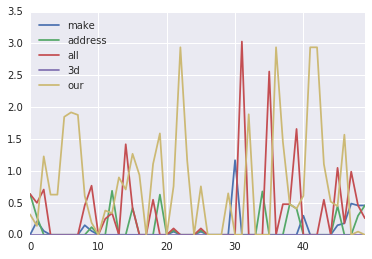

In [4]:
#take the first 50 inputs and take the 5 first words and plot
freq.iloc[:50,range(5)].plot()


## Principal Component Analysis (PCA)
To get more out of this data we need to lower the dimentionality.
This is done with sklearns PCA (IncrementalPCA can be used if dataset cannot fit in memory).

PCA is applied with 54 n_components to make a plot over the variance 

In [ ]:
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


n_components = 54

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)


ax=pd.DataFrame(pca.explained_variance_).plot(title='PCA variance over number of PCA components')
ax.set_xlabel("PCA variance")
ax.set_ylabel("PCA components")

### Plotting PCA
A color scheme is set for better visability.

We want two dimensions to plot it in a 2-D space so we choose $PCA1$ and $PCA2$.
We calculate a new PCA with two components.

Then we define the axis that we computed $PCA1$ $PCA2$ and then we simply plot the $PCA$.

In [ ]:
#color scheme
flatui = [ "#2ecc71","#e74c3c"]
sns.set_palette(flatui)
n_components = 2
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

#plot PCA
spam_pca = pd.DataFrame(X_pca,columns=['pca1','pca2'])
spam_pca = pd.concat([spam_pca, y], axis=1)
sns.FacetGrid(spam_pca, hue="spam", size=5) \
   .map(plt.scatter, "pca1", "pca2") \
   .add_legend()

## Making sense of the plots
As can be seen above the pca clearly groups most of the spam together whereas the real emails are more spread out.

To get some more information we separate the spam from the real e-mails and plot their pca with a histogram for both pca1 and pca2.

In [ ]:
g=np.array(y)
_not= spam_pca[g==0]
_spam= spam_pca[g==1]
sns.jointplot(x="pca1", y="pca2",data=_spam, size=5 , color =flatui[1])

sns.jointplot(x="pca1", y="pca2",data=_not, size=5, color =flatui[0])


### Title
sometext


some more


boxplot

first pca1 as y then pca 2

In [ ]:
ax = sns.boxplot(x="spam", y="pca1", data=spam_pca)
ax = sns.stripplot(x="spam", y="pca1", data=spam_pca, jitter=True, edgecolor="gray")

In [ ]:
ax = sns.boxplot(x="spam", y="pca2", data=spam_pca)
ax = sns.stripplot(x="spam", y="pca2", data=spam_pca, jitter=True, edgecolor="gray")

### Title
sometext


some more


boxplot

first pca1 as y then pca 2

In [ ]:
sns.violinplot(x="spam", y="pca1", data=spam_pca, size=6)

In [ ]:
sns.violinplot(x="spam", y="pca2", data=spam_pca, size=6)

### Title
sometext


some more


pca1 and 2 plotted

In [ ]:
sns.FacetGrid(spam_pca, hue="spam", size=6) \
   .map(sns.kdeplot, "pca2") \
   .add_legend()

### Title
sometext


some more


boxplot

Pairplot of spam pca 

In [ ]:
sns.pairplot(spam_pca, hue="spam", size=3)

### Title
sometext


some more


andrews curvees for 5 spam and 5 not spam

In [ ]:
from pandas.tools.plotting import andrews_curves
X2 = pd.concat([X, y], axis=1)
X20=X2[g==0]
X21=X2[g==1]
X2 = pd.concat([X20[:5],X21[:5]])
andrews_curves(X2, "spam", color=flatui)


### Title
sometext


some more

andrews for full dataset

In [ ]:
X3 = pd.concat([X20,X21])
andrews_curves(X3, "spam",color=flatui)

### Title
sometext


some more

Radviz plot shows plot compared to all features2

In [ ]:
from pandas.tools.plotting import radviz
radviz(X2, "spam", color=flatui)